In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка датасета Iris
iris = load_iris()
X = iris.data[:, 2:]  # Используем только petal length и petal width
y = iris.target

# Создаем DataFrame для визуализации
df = pd.DataFrame(X, columns=['petal length', 'petal width'])
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Разделение на обучающую и тестовую выборки (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
# Создание и обучение модели
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = logreg.predict(X_test_scaled)

# Оценка модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Точность модели
accuracy = logreg.score(X_test_scaled, y_test)
print(f"\nAccuracy: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0000


D:\python\Lab3\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


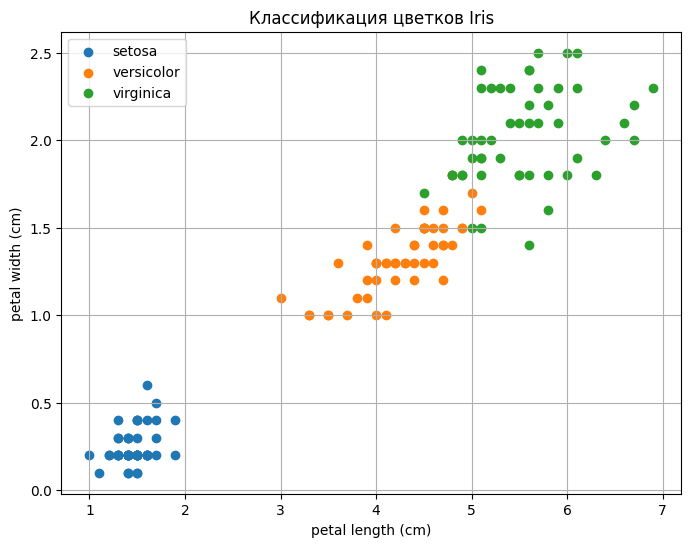

In [5]:
plt.figure(figsize=(8, 6))
for species in ['setosa', 'versicolor', 'virginica']:
    subset = df[df['species'] == species]
    plt.scatter(subset['petal length'], subset['petal width'], label=species)

# Отметим ошибочные предсказания (если есть)
errors = X_test[y_test != y_pred]
if len(errors) > 0:
    plt.scatter(errors[:, 0], errors[:, 1], s=100, facecolors='none', edgecolors='r', linewidths=2, label='Ошибки')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Классификация цветков Iris')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
сравнивая с рисунком, полученным в лабораторной 3.1, можно сделать вывод, что они похожи. различаия есть только у нескольких точек virginica и versicolor